In [1]:
import torch
print(torch.__path__)

['C:\\Users\\ryotu\\anaconda3\\envs\\Torch\\lib\\site-packages\\torch']


# 第2章 訓練済みモデルの利用方法
## 2.1 画像認識の訓練済みモデル
---
### 2.1.1 画像認識のための事前学習ネットワークの取得
ここではAlexNetとResNetをロードし、実行する事を目的とする。

In [2]:
from torchvision import models

In [3]:
dir(models)

['AlexNet',
 'ConvNeXt',
 'DenseNet',
 'EfficientNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'MobileNetV3',
 'RegNet',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 'VisionTransformer',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'convnext',
 'convnext_base',
 'convnext_large',
 'convnext_small',
 'convnext_tiny',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'efficientnet',
 'efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b2',
 'efficientnet_b3',
 'efficientnet_b4',
 'efficientnet_b5',
 'efficientnet_b6',
 'efficientnet_b7',
 'feature_extraction',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'mobilenet_v3_large',
 '

大文字は一般的な訓練済みモデルのPythonクラス<br>
小文字はそれらのクラスからインスタンス化されたモデルを返す便利な関数

### 2.1.2 AlexNet
2012年のILSVRCで2位以下に大差をつけて優勝<br>
ニューラルネットワークとして最初に学んだり、訓練済みモデルを実行する方法を学んだりするのには最適なモデル

In [4]:
alexnet = models.AlexNet()

### 2.1.3 ResNet
関数resnet101を使い、101層の畳み込みニューラルネットワークをインスタンス化する。<br>
101層という深さで2015年に登場した。

In [5]:
resnet = models.resnet101(pretrained=True)

### 2.1.4 準備完了
resnet101がどのようなものか、中身を見てみる。

In [6]:
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

入力する前に画像を適切なサイズに変換し、画素の値がほぼ同じ値範囲に収まるように前処理をする必要がある。<br>
そのために、torchvisionモジュールにはtransformsが用意されており、基本的な前処理機能のパイプラインを簡単に定義する事ができる。

In [7]:
from torchvision import transforms
preprocess = transforms.Compose([
    transforms.Resize(256),     # 256*256に拡大・縮小
    transforms.CenterCrop(224), # 画像中央を中心に224*224にクロップ
    transforms.ToTensor(),      # テンソルに変換
    transforms.Normalize(       # RGB成分を予め定義された平均と標準偏差で正規化
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
)])

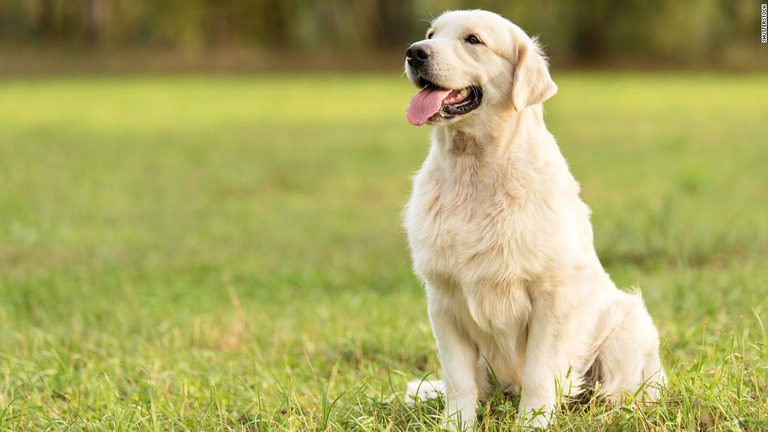

In [8]:
from PIL import Image
img = Image.open("./dog.jpg")
img

In [9]:
img_t = preprocess(img)

In [10]:
import torch
batch_t = torch.unsqueeze(img_t, 0)

### 2.1.5 実行
順伝搬のプロセスは推論と呼ばれ、ネットワークをevalモードに切り替える必要がある。

In [11]:
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
out = resnet(batch_t)
out

tensor([[-4.7660e-01, -2.4399e+00, -3.0030e+00, -3.7863e+00, -2.4460e+00,
         -2.6027e+00, -3.7919e+00, -8.3440e-01,  8.8843e-02, -2.5887e+00,
         -3.8367e-01, -2.4964e-01, -7.2209e-01, -1.2542e+00,  1.5470e-02,
         -3.5341e-01,  7.3266e-02, -6.8392e-01,  3.6202e-01, -5.0628e-01,
         -1.5702e+00,  4.0995e-01, -8.9680e-01,  2.0853e+00,  4.2239e-01,
          7.0644e-01, -6.0995e-01, -9.1500e-01,  2.5789e-02, -8.0507e-01,
         -3.1568e-01, -2.5926e+00, -1.3406e+00, -2.4578e+00, -1.7653e+00,
         -1.1404e+00, -4.1704e-01, -8.7477e-01, -1.4992e+00,  1.5048e-01,
         -3.1901e-01, -1.5582e+00, -1.4302e-01, -2.3238e+00, -1.3290e-01,
         -1.4484e+00,  7.2452e-01,  3.7648e-01, -1.7083e+00, -1.7735e-01,
         -5.6517e-01, -2.5137e+00, -2.7395e-01, -1.4075e+00, -1.4359e+00,
         -1.1177e+00, -2.1618e+00, -2.0397e-01, -1.0065e+00, -1.5480e+00,
         -5.9830e-01, -1.9122e+00, -1.1665e+00,  2.5651e-01, -1.5582e+00,
         -2.8303e+00, -2.5054e+00, -1.

In [13]:
with open("./imagenet_classes.txt") as f:
    labels = [line.strip() for line in f.readlines()]

In [14]:
_, index = torch.max(out, 1)

In [15]:
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100 #出力を[0, 1]の範囲に正規化し、パーセンテージで表示
labels[index[0]], percentage[index[0]].item()

('golden retriever', 85.64044189453125)

In [16]:
_, indices = torch.sort(out, descending=True)
[(labels[idx], percentage[idx].item()) for idx in indices[0][:5]]

[('golden retriever', 85.64044189453125),
 ('Labrador retriever', 4.603912353515625),
 ('kuvasz', 2.586763620376587),
 ('Great Pyrenees', 1.0110619068145752),
 ('Saint Bernard, St Bernard', 0.8449945449829102)]

## 2.2 画像生成の訓練済みモデル
----------------------------------------------------------------
### 2.2.1 GAN(Generative Adversarial Networks):敵対的生成ネットワーク
1つは生成器、もう1つを識別器として、偽画像の作成と判定でお互いを騙し、出し抜こうとする2つのネットワークを使用する。

### 2.2.2 CycleGAN
CycleGANはあるドメインの画像を別のドメインの画像に変換できる。

### 2.2.3 ウマをシマウマに変えるネットワーク
CycleGANネットワークはImageNetデータセットから抽出されたウマの画像とシマウマの画像のデータセットで訓練されている。このネットワークはウマ以外の残りの部分はできる限り変更せず、すべてのウマをシマウマに変換することを学習する。<br>
難しいので、今はネットワークで何ができるかに着目する。

以降は訳者のリポジトリを参照せよ。(p1ch2/3_cyclegan.ipynb)

## 2.3 画像の内容を説明する訓練済みモデル
----------------------------------------------------------------
NeuralTalk2等が挙げられる。(詳細は略)

## 2.4 Torch Hubとは
----------------------------------------------------------------
PyTorchではPyTorchのインターフェスを介してGitHub上で公開されたモデルを扱える機能がある。

In [21]:
import torch
from torch import hub

resnet18_model = hub.load("pytorch/vision:main",
                          "resnet18",
                          pretrained=True)

Downloading: "https://github.com/pytorch/vision/archive/main.zip" to C:\Users\ryotu/.cache\torch\hub\main.zip


ImportError: cannot import name 'efficientnet_v2_s' from 'torchvision.models.efficientnet' (C:\Users\ryotu\anaconda3\envs\Torch\lib\site-packages\torchvision\models\efficientnet.py)

ここではエラーが出てしまった。